In [26]:
%reload_ext autoreload
%autoreload 2
from util import util
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# train signals
%store -r signal_1_1_hor
%store -r signal_1_2_hor
%store -r signal_1_1_vert
%store -r signal_1_2_vert

%store -r signal_2_1_hor
%store -r signal_2_2_hor
%store -r signal_2_1_vert
%store -r signal_2_2_vert

%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_1_3_hor
%store -r signal_1_4_hor
%store -r signal_1_5_hor
%store -r signal_1_6_hor
%store -r signal_1_7_hor
%store -r signal_1_3_vert
%store -r signal_1_4_vert
%store -r signal_1_5_vert
%store -r signal_1_6_vert
%store -r signal_1_7_vert

%store -r signal_2_3_hor
%store -r signal_2_4_hor
%store -r signal_2_5_hor
%store -r signal_2_6_hor
%store -r signal_2_7_hor
%store -r signal_2_3_vert
%store -r signal_2_4_vert
%store -r signal_2_5_vert
%store -r signal_2_6_vert
%store -r signal_2_7_vert

%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train = [signal_1_1_hor, signal_1_2_hor, signal_2_1_hor, signal_2_2_hor, signal_3_1_hor, signal_3_2_hor]
vert_train = [signal_1_1_vert, signal_1_2_vert, signal_2_1_vert, signal_2_2_vert, signal_3_1_vert, signal_3_2_vert]

hor_test = [signal_1_3_hor, signal_1_4_hor, signal_1_5_hor, signal_1_6_hor, signal_1_7_hor,
            signal_2_3_hor, signal_2_4_hor, signal_2_5_hor, signal_2_6_hor, signal_2_7_hor,
            signal_3_3_hor]
vert_test = [signal_1_3_vert, signal_1_4_vert, signal_1_5_vert, signal_1_6_vert, signal_1_7_vert,
             signal_2_3_vert, signal_2_4_vert, signal_2_5_vert, signal_2_6_vert, signal_2_7_vert,
             signal_3_3_vert]

spectros_train_hor = [util.getSpectro(signal) for signal in hor_train]
spectros_train_vert = [util.getSpectro(signal) for signal in vert_train]

spectros_test_hor = [util.getSpectro(signal) for signal in hor_test]
spectros_test_vert = [util.getSpectro(signal) for signal in vert_test]

In [3]:
expName = 'b123_hor_vert'

In [21]:
testspecs = [
    ['1_3', 5730],
    ['1_4', 339],
    ['1_5', 1610],
    ['1_6', 1460],
    ['1_7', 7570],
    ['2_3', 7530],
    ['2_4', 1390],
    ['2_5', 3090],
    ['2_6', 1290],
    ['2_7', 580],
    ['3_3', 820]
]

##################
# Test: 1_3
##################
1802/1802 [==============================] - 2s 846us/step
##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 1ms/step
##################
# Test: 1_5
##################
2302/2302 [==============================] - 2s 736us/step
##################
# Test: 1_6
##################
2302/2302 [==============================] - 2s 731us/step
##################
# Test: 1_7
##################
1502/1502 [==============================] - 2s 1ms/step
##################
# Test: 2_3
##################
1202/1202 [==============================] - 2s 1ms/step
##################
# Test: 2_4
##################
612/612 [==============================] - 2s 3ms/step
##################
# Test: 2_5
##################
2002/2002 [==============================] - 2s 896us/step
##################
# Test: 2_6
##################
572/572 [==============================] - 2s 3ms/step
##################
# Test: 2_7
##

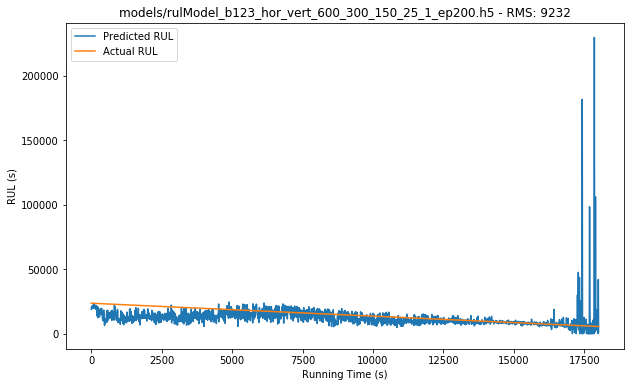

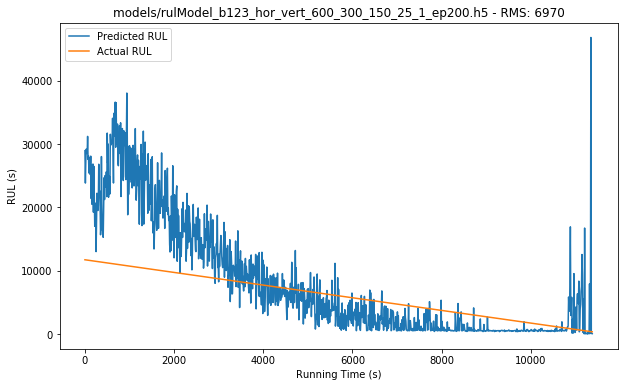

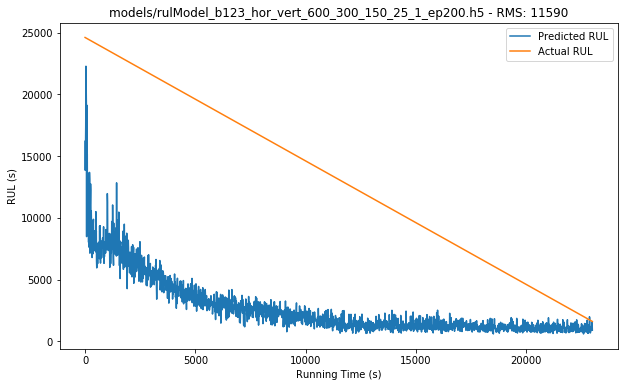

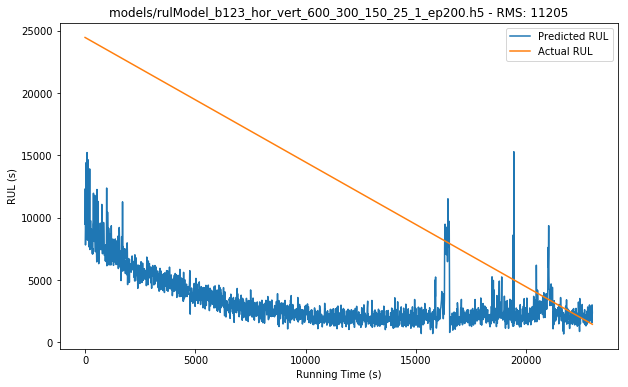

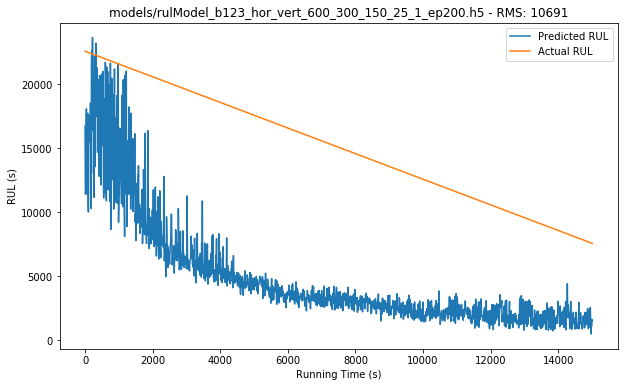

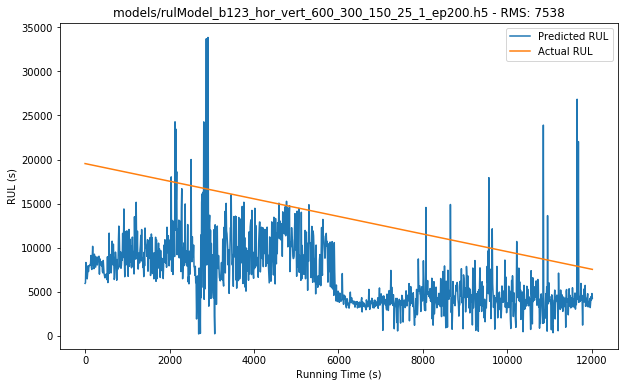

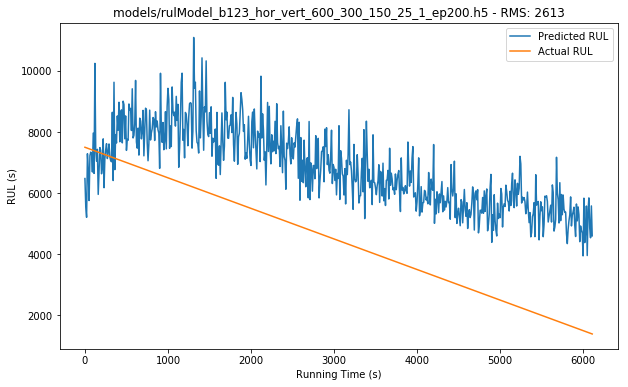

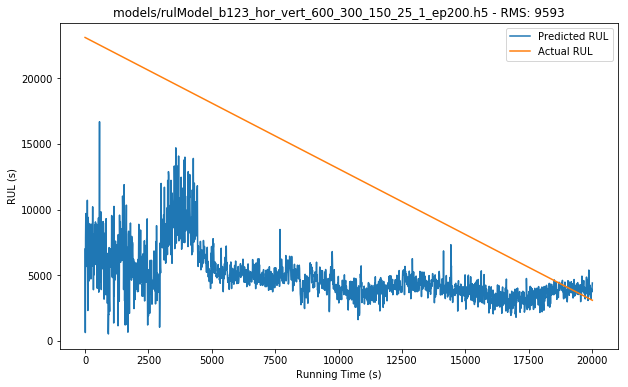

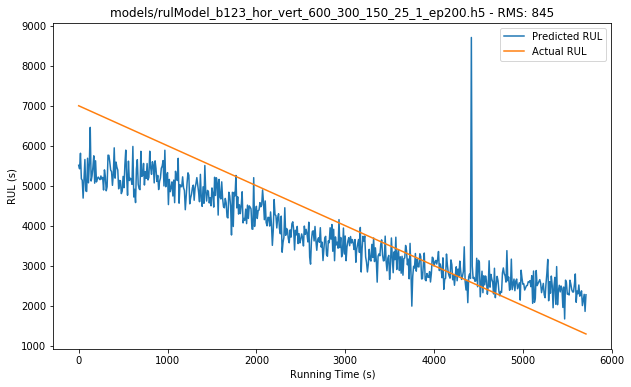

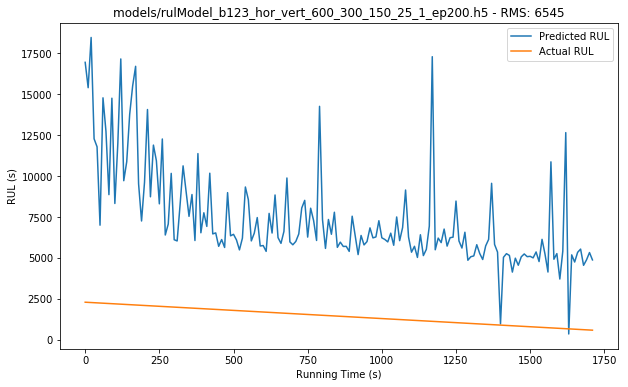

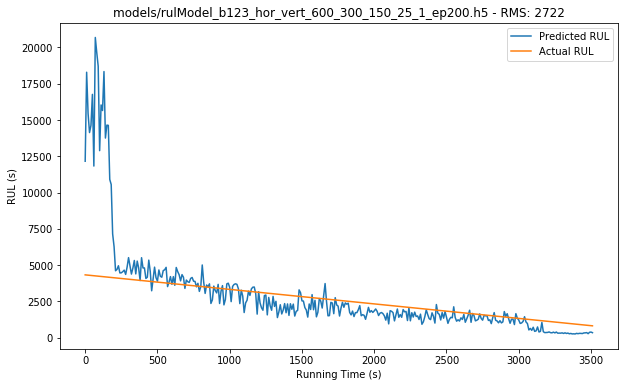

In [22]:
layersizes = [600,300,150,25]
epochss = [50, 100, 200, 500]
epochss = [200]
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL, 
                          plotname='bearing' + testspecs[testIndex][0] + '.png')

In [23]:
# plot training values
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)

(7534, 2562)


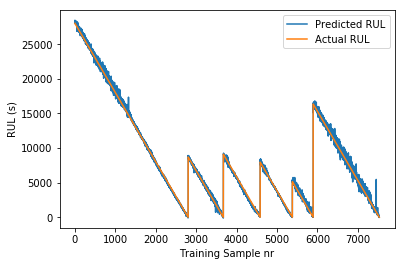

In [32]:
nr_samples = len(X_train)
x_ax_values = [10 * i for i in range(nr_samples)]

modelname = util.getModelName(layersizes, 200, expName)
rulModel = load_model(modelname)

plt.figure()
predictions = rulModel.predict(X_train)
plt.plot(predictions,label='Predicted RUL')
plt.plot(Y_train, label='Actual RUL')
plt.ylabel('RUL (s)')
plt.xlabel('Training Sample nr')
plt.legend()
plt.savefig('plots/trainingResults.png', bbox_inches='tight', dpi=300)  # 600

# plt.plot(x_ax_values, Y_values,label='Actual RUL')
# plt.title(modelnames[nr] + ' - RMS: {:.0f}'.format(rms))
# plt.ylabel('RUL (s)')
# plt.xlabel('Running Time (s)')
# plt.legend()

# if len(plotname) > 0:
#     plt.savefig('plots/' + plotname, bbox_inches='tight', dpi=300)  # 600
# else:
#     plt.show()


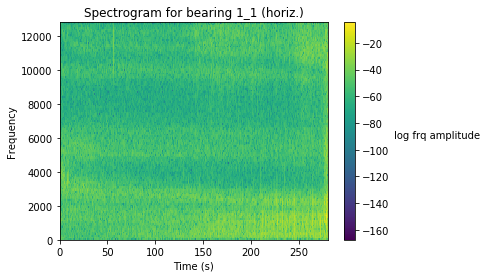

In [43]:
plt.specgram(signal_1_1_hor, Fs=25600, cmap='viridis')

plt.title('Spectrogram for bearing 1_1 (horiz.)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.colorbar()
plt.savefig('plots/spectrogram1_1.png', bbox_inches='tight', dpi=300) 
plt.text(350,6000,'log frq amplitude')
plt.show()

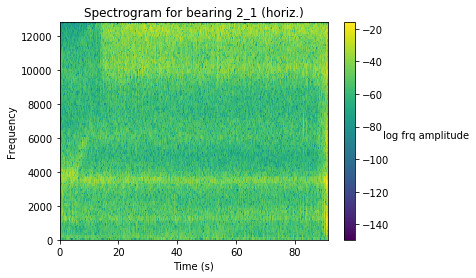

In [49]:
plt.specgram(signal_2_1_hor, Fs=25600, cmap='viridis')

plt.title('Spectrogram for bearing 2_1 (horiz.)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.colorbar()
plt.savefig('plots/spectrogram2_1.png', bbox_inches='tight', dpi=300) 
plt.text(110,6000,'log frq amplitude')
plt.show()